Glass Identification Dataset
Problem Statement:
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!



The chemical compositions are measured as the weight percent in corresponding oxide.

Attribute Information-

 Id number: 1 to 214
 RI: refractive index
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
Mg: Magnesium
Al: Aluminum
Si: Silicon
K: Potassium
Ca: Calcium
Ba: Barium
Fe: Iron
Type of glass: (class attribute)
1- building_windows_float_processed
2- building_windows_non_float_processed
3- vehicle_windows_float_processed
4- vehicle_windows_non_float_processed (none in this database)
5- containers
6- tableware
7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 


Predict : Type of glass

In [354]:
#importing libraries for pandas, numpy
import pandas as pd
import numpy as np

#importing libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [355]:
#importing dataset
data=pd.read_csv('glass.csv')
data.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [356]:
# replacing column names in dataset and saving it
data.rename(columns={'1': 'id', '1.52101': 'RI','13.64':'Na','4.49':'Mg','1.10':'Al',
                     '71.78':'Si','0.06':'K','8.75':'Ca','0.00':'Ba','0.00.1':'Fe','1.1':'glass_type'}, inplace=True)

In [357]:
#adding row in dataset
df = pd.DataFrame({'id': [1], 'RI': [1.52101],'Na':[13.64],'Mg':[4.49],'Al':[1.10],
                     'Si':[71.78],'K':[0.06],'Ca':[8.75],'Ba':[0.00],'Fe':[0.001],'glass_type':[1]})

In [358]:
data = df.append(data, ignore_index = True)

In [359]:
data.head()

,id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.001,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.000,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.000,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.000,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.000,1


In [360]:
# displaying column names
data.columns

Index(['id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'glass_type'],
      dtype='object')

In [361]:
#shaoe of dataset
data.shape

(214, 11)

Observation:
- There are 214 rows and 11 column in this dataset.


In [362]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          214 non-null    int64  
 1   RI          214 non-null    float64
 2   Na          214 non-null    float64
 3   Mg          214 non-null    float64
 4   Al          214 non-null    float64
 5   Si          214 non-null    float64
 6   K           214 non-null    float64
 7   Ca          214 non-null    float64
 8   Ba          214 non-null    float64
 9   Fe          214 non-null    float64
 10  glass_type  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [363]:
#checking for null values
data.isna().sum()

id            0
RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
glass_type    0
dtype: int64

Observation:
- No null values present in dataset    

In [364]:
#checking for duplicate entries
data.duplicated().sum()

0

Observation:
- No duplicates entries in dataset

In [365]:
print(data['glass_type'].unique())
print('value count',data['glass_type'].value_counts())

[1 2 3 5 6 7]
value count 2    76
1    70
7    29
3    17
5    13
6     9
Name: glass_type, dtype: int64


# Dividing the label(glass_type) column into 2 types i.e window glass (classes 1-4) and non-window glass (classes 5-7)

In [366]:
# Dividing the label into 2 class namely 0 for window glass (classes 1-4) and 1 for non-window glass (classes 5-7)
data['glass_type'].replace(to_replace=[1,2,3,4],value=0,inplace=True)
data['glass_type'].replace(to_replace=[5,6,7],value=1,inplace=True)

# Note: 
- 0 is assigned for window glass of class 1-4
- 1 is assigned for non window glass of class 5-7


In [367]:
#checking the dataset
print(data['glass_type'].unique())
print('value count',data['glass_type'].value_counts())

[0 1]
value count 0    163
1     51
Name: glass_type, dtype: int64


In [368]:
data.describe()

,id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057014,0.238318
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097436,0.427053
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,0.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,0.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,0.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,0.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,1.000000


Observation:
- id column is serial number column.
- The highest refractive index(RI) for glass is 1.533930 and lowest RI is 1.511150. The average RI for glass is in range of   1.518353.It is continuous data.
- Na(Sodium) is continuous data with highest in 17.38 weight% and lowest of 10.73 weight%
- Mg(magnesium) is a continuous data with highest in 3.98 weight% and lowest of 0 weight%
- Al(Aluminium) is continuous data with highest in 3.50 weight% and lowest of 0.29 weight%
- Si(Silicon) is continuous data with highest in 75.41 weight% and lowest of 69.81 weight%
- K(Potassium) is continuous data with highest in 6.21 weight% and lowest of 0 weight%
- Ca(Calcium) is continuous data with highest in 16.19 weight% and lowest of 5.43 weight%
- Ba(Barium) is continuous data with highest in 3.15 weight% and lowest of 0 weight%
- Fe(Iron) is continuous data with highest in 0.51 weight% and lowest of 0 weight%
- the standard deviation is high for Mg and Ca with respect to other oxide columns.

In [369]:
#dropping id column
data=data.drop('id',axis=1)

In [370]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.001,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.000,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.000,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.000,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.000,0


<AxesSubplot:xlabel='RI'>

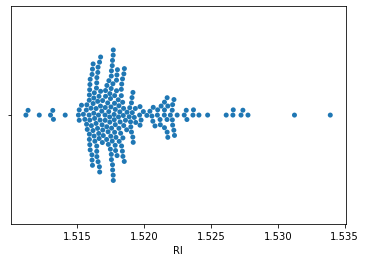

In [371]:
sns.swarmplot(x='RI',data=data)

 Observation:
 - This shows that the concentration of RI in various glass ranges from approx.1.50 to approx. 1.535. But most glasses has concentration ranging from 1.515 approx. to 1.522 approx.
    

<AxesSubplot:xlabel='Na'>

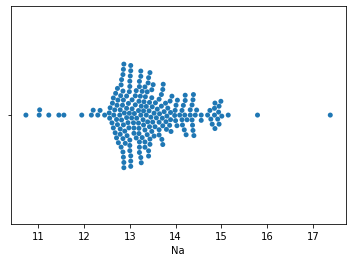

In [372]:
sns.swarmplot(x='Na',data=data)

Observation:
- This shows that  the concentration of Na in various glass ranges from  approx.10 to approx. 17. But most glasses has concentration ranging from approx 12.5 to 15.2 approx

<AxesSubplot:xlabel='Al'>

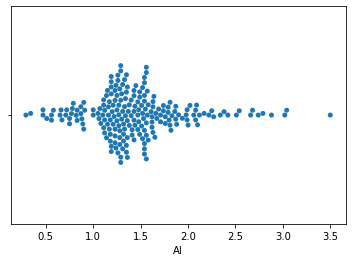

In [373]:
 sns.swarmplot(x='Al',data=data)

Observation:This shows that the concentration of Al in various glass ranges from approx.0.3 to approx. 3.5. But most glasses has concentration ranging from approx 0.5 to 2.3 approx

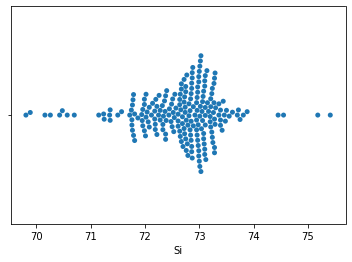

In [374]:
sns.swarmplot(data['Si'])
plt.show()

Observation:
- Since Silicon being the basic raw material to manufacture glass, concentration of silicon should be higher compared to other oxides.
- plot shows that the concentration of Si in various glass ranges from approx.70 to approx. 75. But most glasses has concentration ranging from approx 71.5 to 73.7 approx

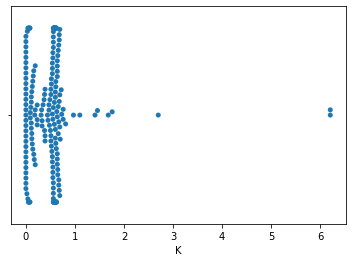

In [375]:
sns.swarmplot(data['K'])
plt.show()

Observation:This shows that the concentration of K in various glass ranges from approx.0.1 to approx. 3. But most glasses has concentration ranging from approx 0 to 0.8 approx

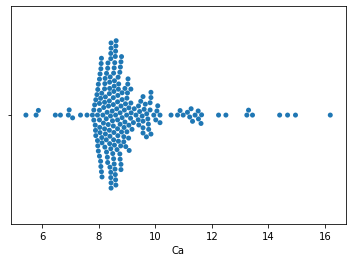

In [376]:
sns.swarmplot(data['Ca'])
plt.show()

Observation:This shows that the concentration of Ca in various glass ranges from approx.5.5 to approx. 15. But most glasses has concentration ranging from approx 8 to 10 approx

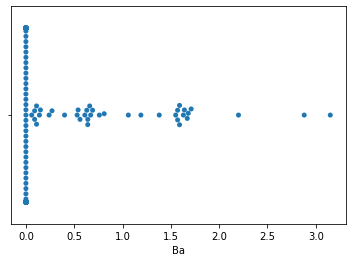

In [377]:
sns.swarmplot(data['Ba'])
plt.show()

Observation:
- Most of the glass has nil Ba as shown in graph but some glass has it in range of approx 0 to 1.7.


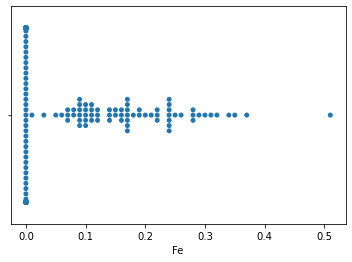

In [378]:
sns.swarmplot(data['Fe'])
plt.show()

Observation:
- Most of the glass has nil Fe as shown in graph but some glass types has it in range of approx 0 to 0.37.

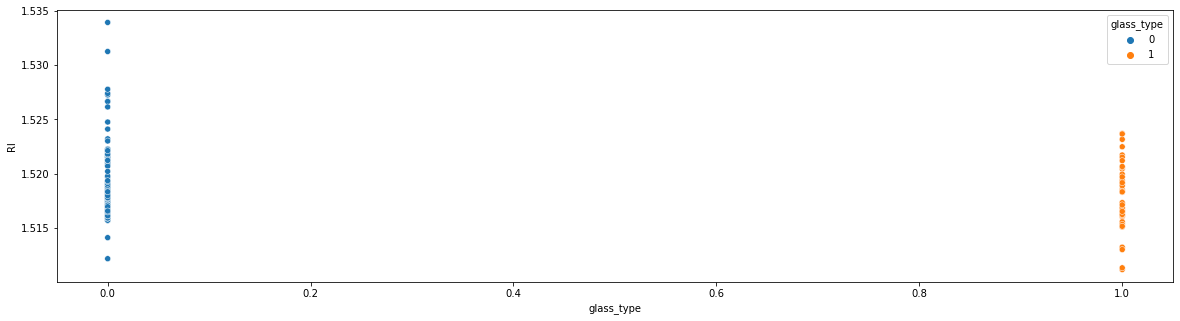

In [379]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='glass_type',y='RI',data=data,hue='glass_type')
plt.show()

Observation:
- The refractive index for window glass is higher and goes high upto 1.534 approx. compared to non window glass which goes as high as 1.525 approx.

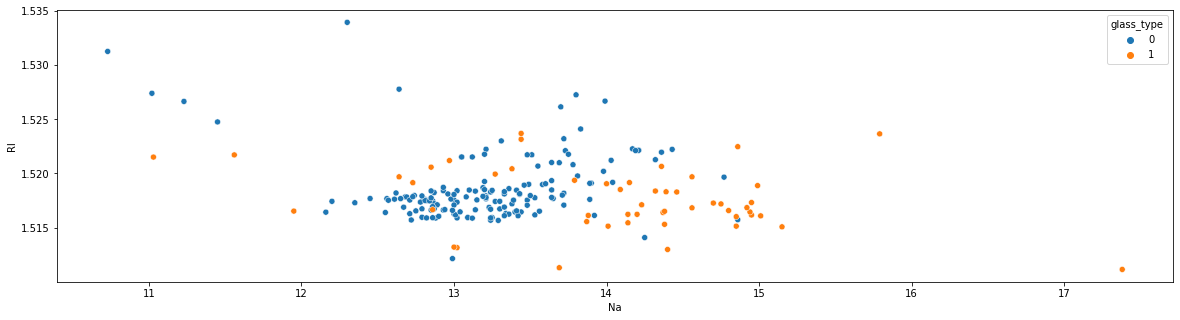

In [380]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='Na',y='RI',data=data,hue='glass_type')
plt.show()

Observation:
- For window glass the concentration of Na is less as seen in graph. But for non window glass the concentration of Na increases.This observation is for most of the data points.

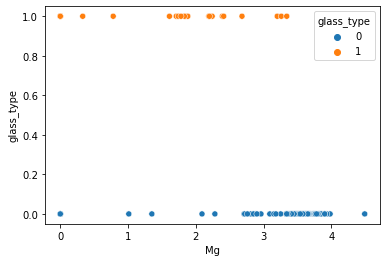

In [381]:
sns.scatterplot(x='Mg',y='glass_type',data=data,hue='glass_type')
plt.show()

Observation:
- Concentration of Mg is higher in  window glass compared to non- window glass.

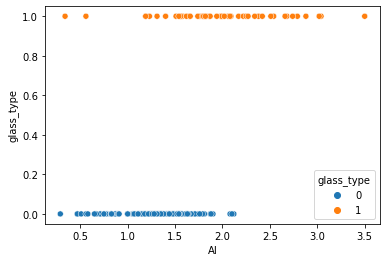

In [382]:
sns.scatterplot(x='Al',y='glass_type',data=data,hue='glass_type')
plt.show()

Observation:
- Concentration of Al is higher in non window glass compared to window glass.

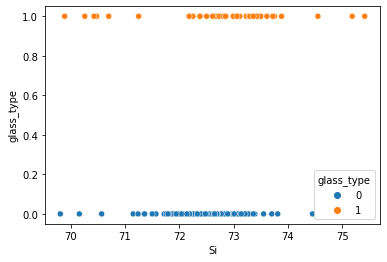

In [383]:
sns.scatterplot(x='Si',y='glass_type',data=data,hue='glass_type')
plt.show()

Observation:
- Since silicon being raw material, there is no general relation between the concentration of silicon present.    

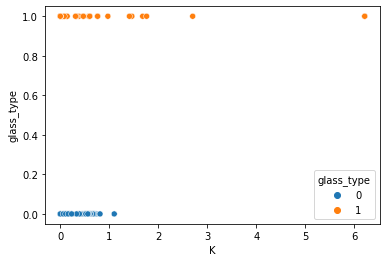

In [384]:
sns.scatterplot(x='K',y='glass_type',data=data,hue='glass_type')
plt.show()

Observation:
- Potasssium is present almost same in both type of glass. but in case of window glass type its concentration can be more. 

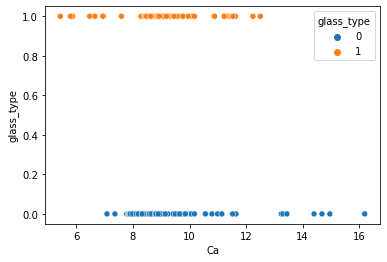

In [385]:
sns.scatterplot(x='Ca',y='glass_type',data=data,hue='glass_type')
plt.show()

Observation:
- The presence of Calcium in window glass is more is more compared to non window type.

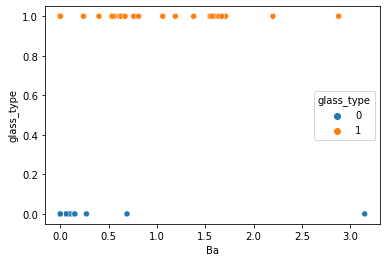

In [386]:
sns.scatterplot(x='Ba',y='glass_type',data=data,hue='glass_type')
plt.show()

Observation:
- The presence of barium in window glass is very less compared to non window glass.

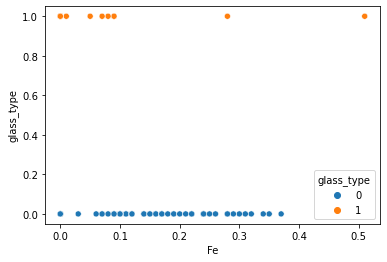

In [387]:
sns.scatterplot(x='Fe',y='glass_type',data=data,hue='glass_type')
plt.show()

Observation:

- The presence of Iron in non window glass is very less compared to  window glass.

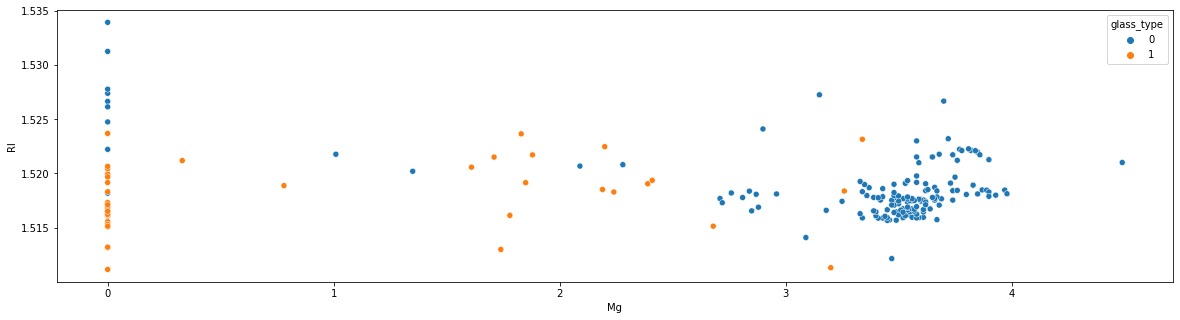

In [388]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='Mg',y='RI',data=data,hue='glass_type')
plt.show()

Observation:
- refractive index is higher when there is no/very less Mg present in window glass.
- In case of non window glass refractive index varies after addition of Mg.


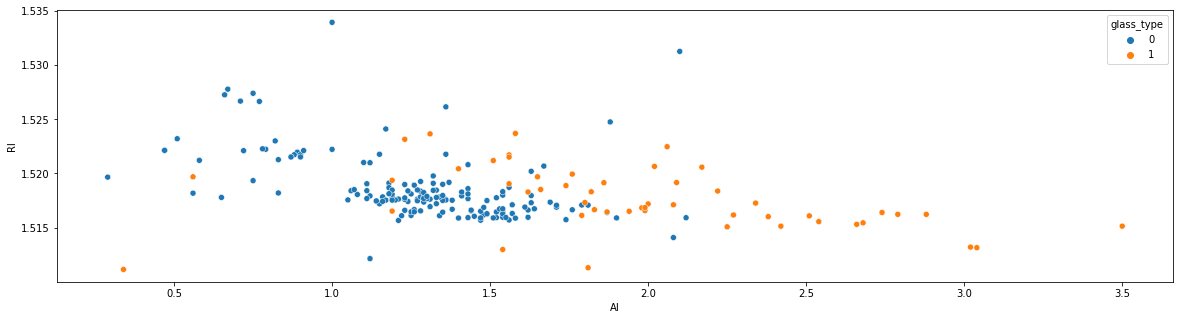

In [389]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='Al',y='RI',data=data,hue='glass_type')
plt.show()

Observation:
- Highest refractive index is shown by window glass when Al is approx. 1% in weight. 
- The non window glass has Al concentration of >1.7 approx in most cases with refractive index going down as concentration increases.

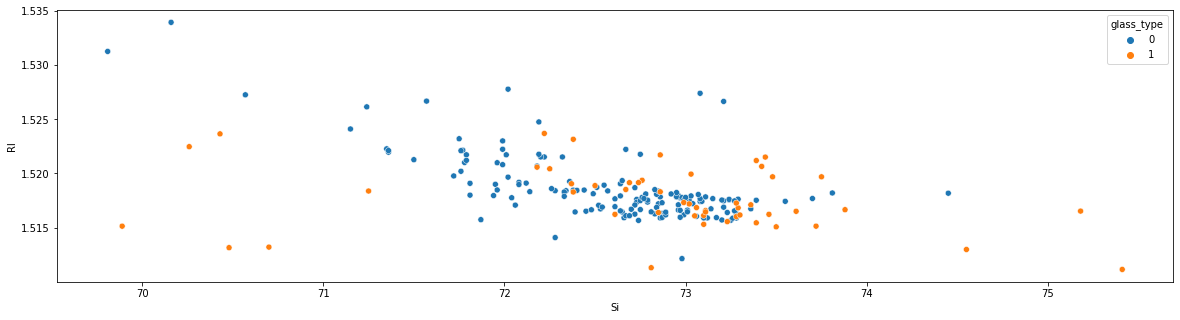

In [390]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='Si',y='RI',data=data,hue='glass_type')
plt.show()

Observation:
- The refractive index for window glass is highest when Si is at 70.3.and it keeps on decreasing when Si increases. 
- Lowest refractive index if is found in non window glas when Si is at 75.5 approx.

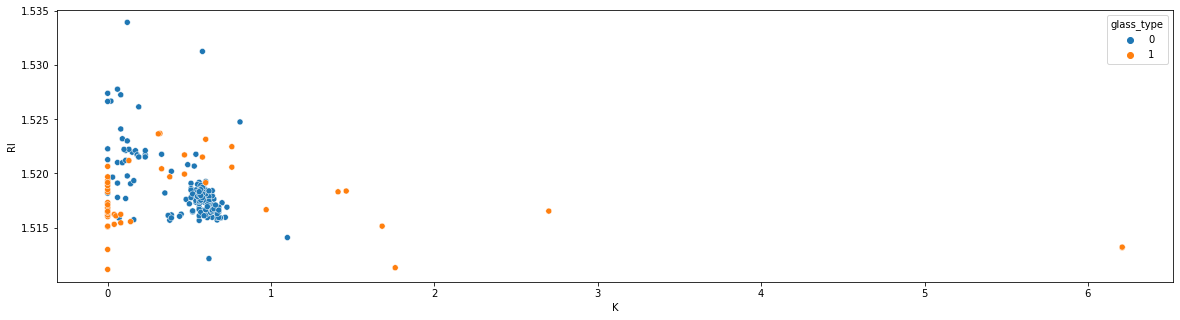

In [391]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='K',y='RI',data=data,hue='glass_type')
plt.show()

Observation:
- Refractive index is higher in window glass and when potassium is less and decrease as K increases.
- refractive index seen higher for non window glass when K is higher.


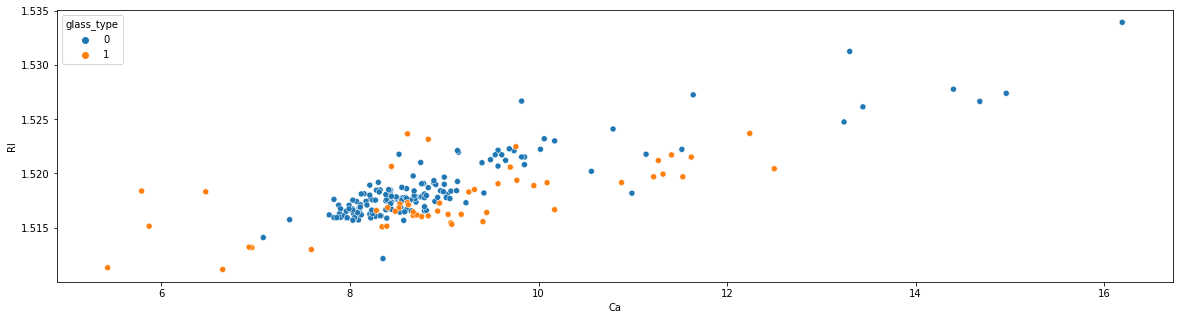

In [392]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='Ca',y='RI',data=data,hue='glass_type')
plt.show()

Observation:
- as Ca increases its Refractive index increases in both kind of glass types.    

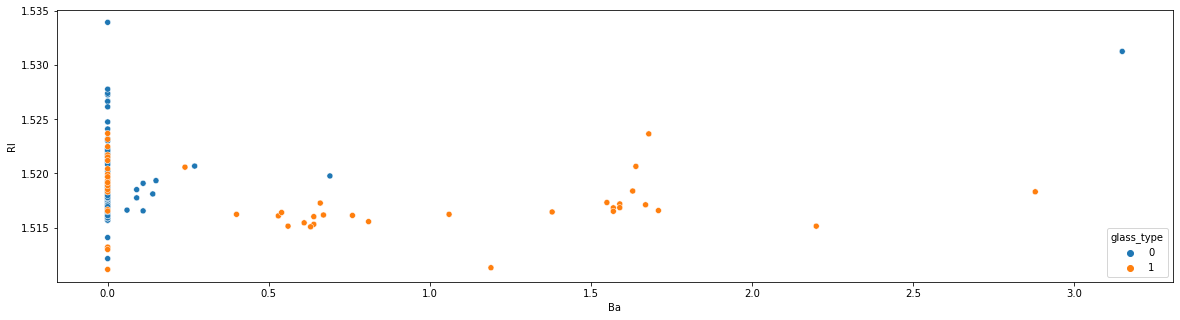

In [393]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='Ba',y='RI',data=data,hue='glass_type')
plt.show()

Observation:
- if Ba is 0/very less than refractive index is higher for window glass.
- as Ba increase refractive index decreases and this feature is only seen in non window glass.

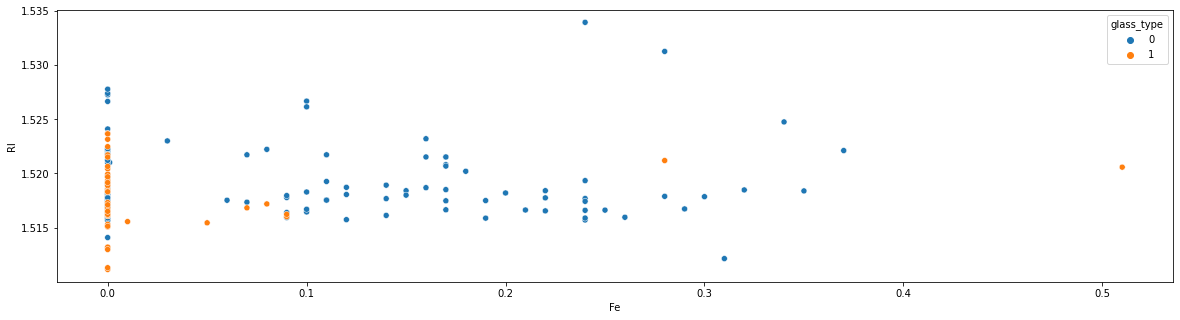

In [394]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='Fe',y='RI',data=data,hue='glass_type')
plt.show()

Observation:
- Fe is mostly 0 or nill in non window glass with refractive index ranging from 1.5 to 1.524 approx.
- As concentration of Fe increases the refractive index almost remains stable in range of 1.515 to 1.525 in window glass.

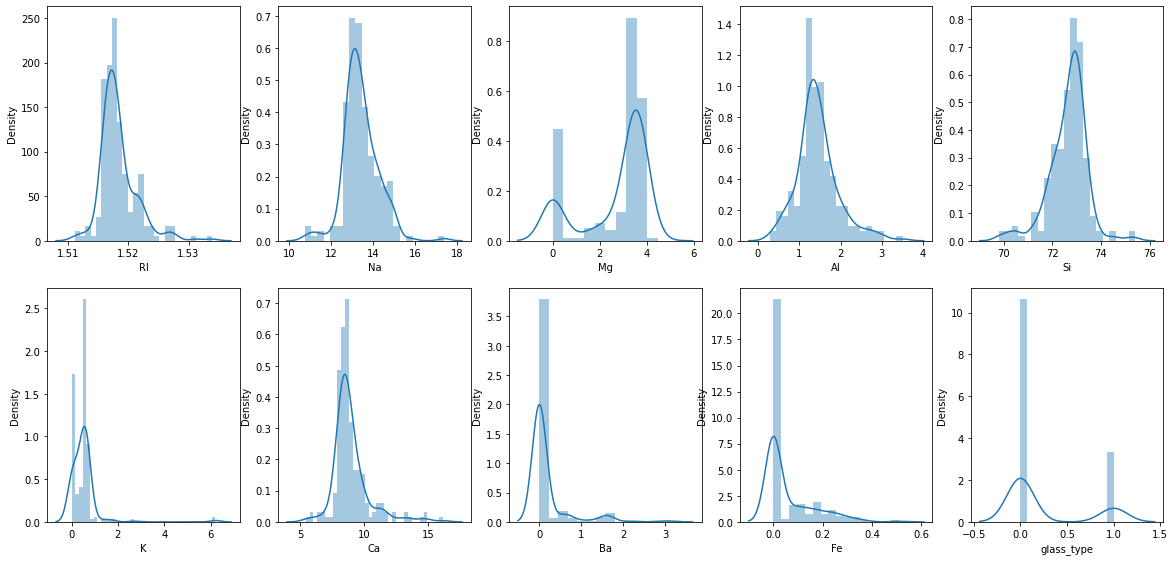

In [395]:
#plotting distplot to check for skewness
plt.figure(figsize=(20,25))
plotnumber=1

for column in data:
    if plotnumber<= 10:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

Observation:
- Only column that is less skewed is Al otherwise all the other columns are skewed.
- glass_type column is categorical so it cannot resemble a bell shaped curve.
- As seen in graph all the columns has outliers present in them.

In [396]:
#checking for skewness
data.skew()

RI            1.625431
Na            0.454181
Mg           -1.152559
Al            0.907290
Si           -0.730447
K             6.551648
Ca            2.047054
Ba            3.416425
Fe            1.754378
glass_type    1.237086
dtype: float64

Observation:
- glass_type is label with categorical data.
- All the other columns has skewness present. 
- Na column just under the skewness range of +-0.5 but looking at its plot looks like its is skewed.

# Applying power transformer to remove skewness

In [397]:
#importing libraries for power transformer and Standard Scaler

from sklearn.preprocessing import StandardScaler,PowerTransformer


features=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe'] #selecting features that need to be transformed

scaler=PowerTransformer(method='yeo-johnson')#using yeo-johnson to transform/remove skewness

data[features]=scaler.fit_transform(data[features])

In [398]:
#checking for values of skewness after applying power transformer method 
data.skew()

RI            0.000000
Na           -0.008973
Mg           -0.889528
Al            0.000219
Si            0.130384
K            -0.071816
Ca           -0.209314
Ba            1.824175
Fe            0.858503
glass_type    1.237086
dtype: float64

Observation:
- skewness is considerably reduced after applying power transformer.

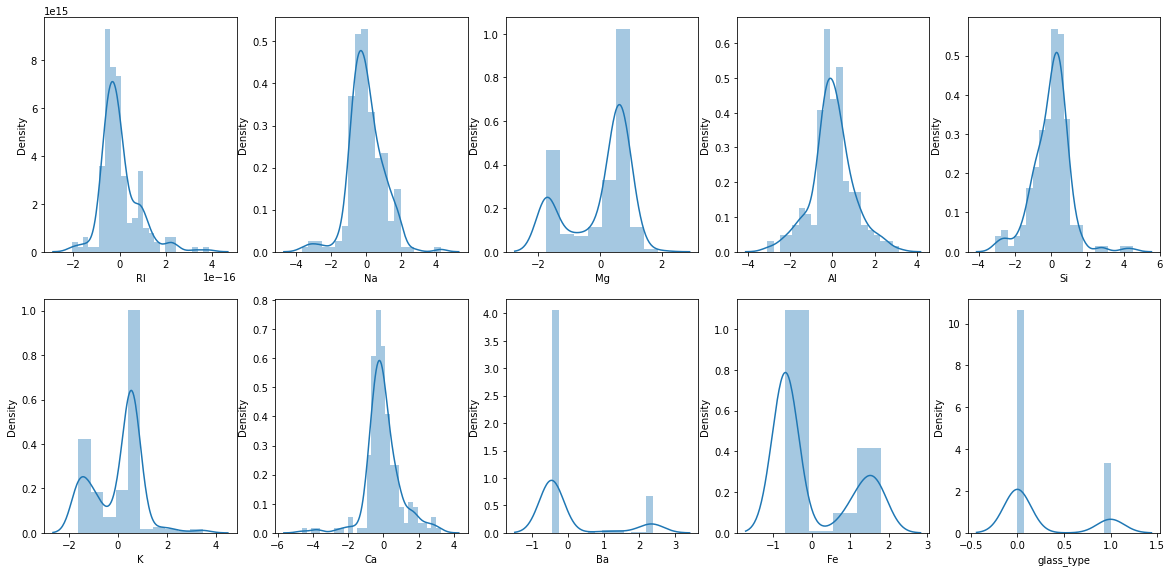

In [399]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in data:
    if plotnumber<= 10:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

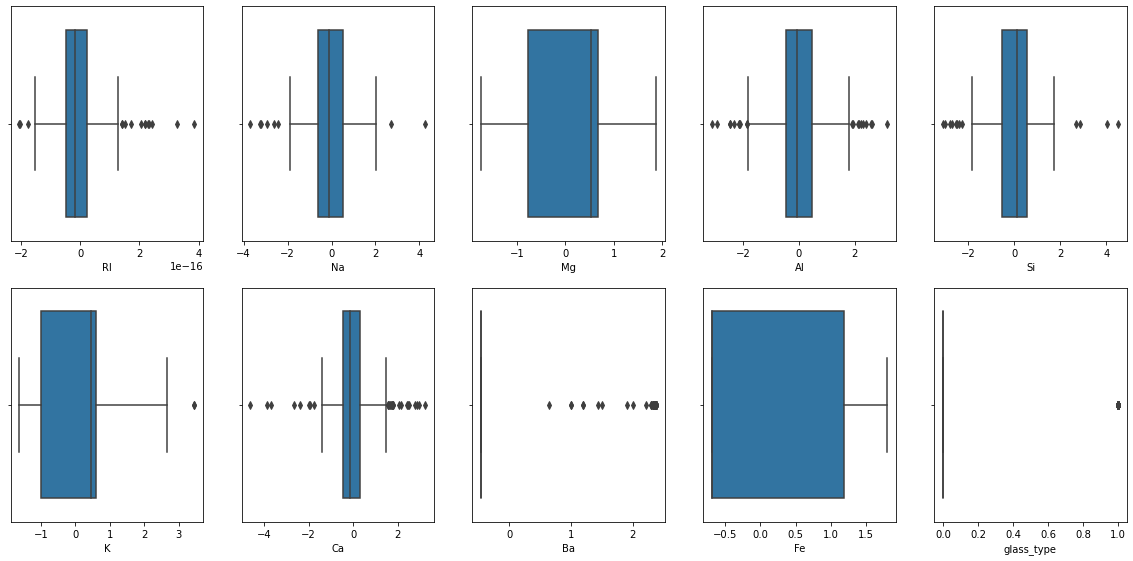

In [400]:
#plotting boxplots for dataset to check for outliers

plt.figure(figsize=(20,25))
plotnumber=1

for column in data:
    if plotnumber<= 10:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

Observation:
- Outliers are seen in most of the columns.

# Removal of outliers using z-score method

In [401]:
#importing library
from scipy.stats import zscore

z_score=zscore(data[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']])

In [402]:
abs_z_score=np.abs(z_score)

In [403]:
filtering_entry=(abs_z_score<3).all(axis=1)

In [404]:
data=data[filtering_entry]

In [405]:
#data shape after removing outliers
data.shape 

(201, 10)

Observation:
- There were 214 rows in dataset. After removing outliers it is reduced 201

# data loss after removing outliers

In [406]:
# data loss percentage 
data_loss=((214-201)/214)*100
print(f'data loss in percent after removing outliers is: {data_loss}%')

data loss in percent after removing outliers is: 6.074766355140187%


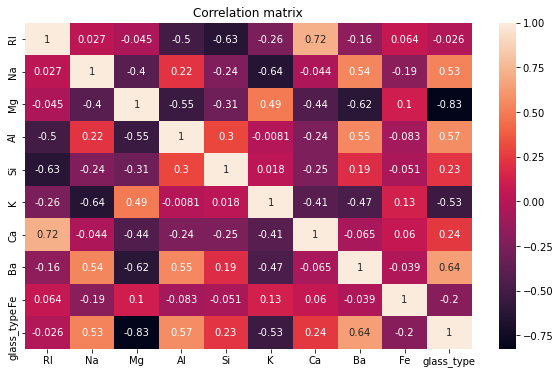

In [407]:
#finding correlation within dataset
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation matrix')
plt.show()

Observation:
- It is seen that relation of barium is highest related to type of glass i.e. of 64%. Also Al and Na are >50% related to type of glass. (confirmed in scatter plots)
- barium is also related >50% to Na and Al.
- Calcium is related to Refractive Index (confirmed in above scatter plots)
- Mg is negatively related to type of glass for about 83% and also negatively related to Ba for 62%.(confirmed in above scatter plots)
- K is 49% related to Mg.
- Silicon and Aluminium is negatively related for 63% and 50% respectively to Refractive index.(confirmed in above scatter plots)
- Al is negatively related to Mg for 55%
- Mg is negatively related to Sodium for 40%


<AxesSubplot:xlabel='Ba', ylabel='Al'>

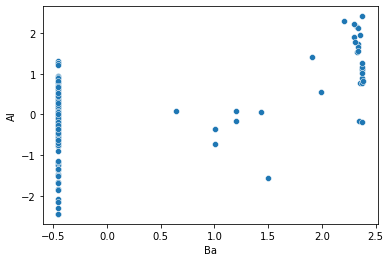

In [408]:
sns.scatterplot(x='Ba',y='Al',data=data)

<AxesSubplot:xlabel='Ba', ylabel='Na'>

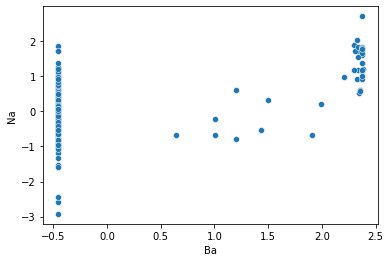

In [409]:
sns.scatterplot(x='Ba',y='Na',data=data)

Observation :
- There is some relationship seen in above both plots. As value of Ba increases the value of Na and Al is also increased.

<AxesSubplot:xlabel='K', ylabel='Mg'>

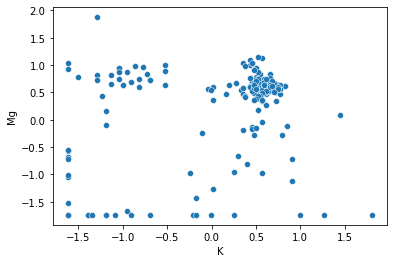

In [410]:
sns.scatterplot(x='K',y='Mg',data=data)

Observation: distinguishing relationship is not observed.

<AxesSubplot:xlabel='Al', ylabel='Mg'>

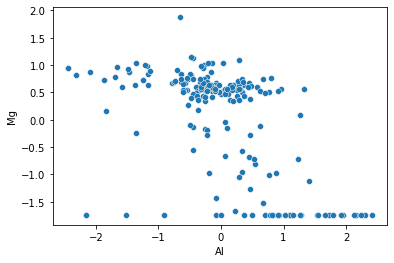

In [411]:
sns.scatterplot(x='Al',y='Mg',data=data)

Observation: distinguishing relationship is not observed throughout; but as Al increasd for >1.5 there is no relatiosnhip with Al

<AxesSubplot:xlabel='Mg', ylabel='Si'>

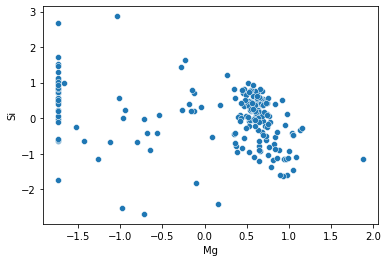

In [412]:
sns.scatterplot(x='Mg',y='Si',data=data)

Observation: distinguishing relationship is not observed

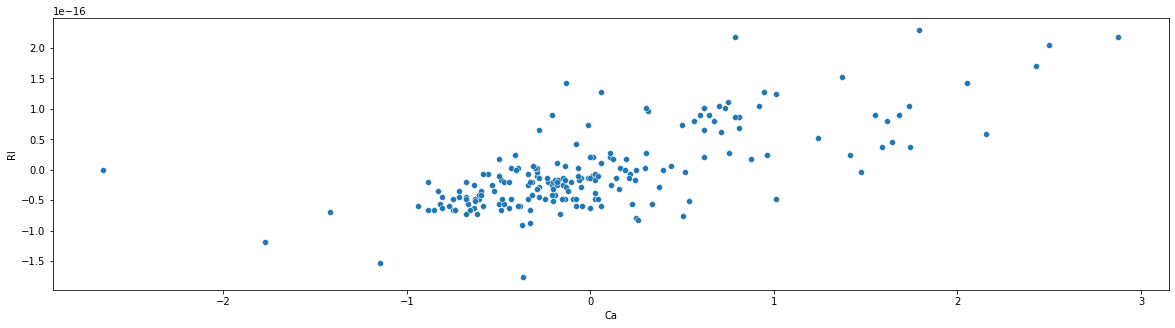

In [413]:
plt.figure(figsize=(20,5))
sns.scatterplot(x='Ca',y='RI',data=data)
plt.show()

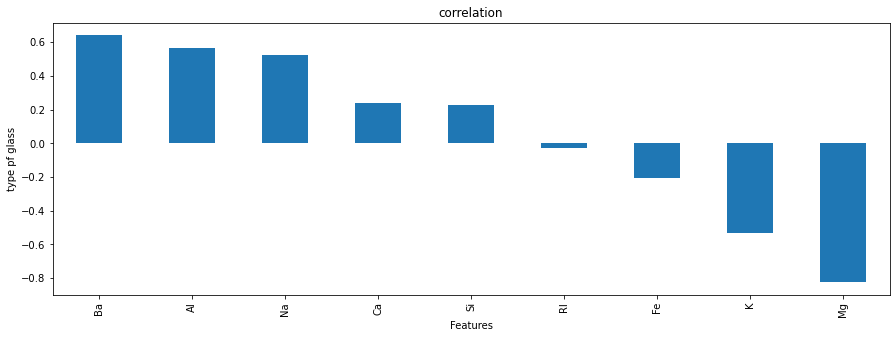

In [414]:
# As I cannot devise a relationship within dataset, plotting correlation of features with respect to label.
plt.figure(figsize=(15,5))
data.corr()['glass_type'].sort_values(ascending=False).drop(['glass_type']).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('type pf glass')
plt.title('correlation')
plt.show()

Observation for both above plots:
- With respect to scatter plot between Ca and RI it is seen that they show positive trend.
- As confirmed from heatmap is Ba is most related (positively) and Mg is most related(negatively).
- RI is least related to glass type.


# Note:
Ca and RI scatter plot shows positive trend and they have collinearity of >70%. In addition RI is least related to label(glass_type) i.e. for -0.026. Hence the RI column will be dropped.

In [415]:
#dropping RI column
data=data.drop(['RI'],axis=1)

In [416]:
#dataset after removing RI column
data.head()

,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,0.317061,1.876273,-0.662630,-1.138642,-1.289781,-0.010654,-0.45489,-0.644070,0
1,0.616577,0.668163,-0.077498,0.044314,0.274843,-0.884532,-0.45489,-0.680261,0
2,0.183344,0.608046,0.291075,0.400267,0.018565,-0.938251,-0.45489,-0.680261,0
3,-0.212585,0.778426,-0.228458,-0.115117,0.501963,-0.488967,-0.45489,-0.680261,0
4,-0.137547,0.692438,-0.339129,0.526911,0.453753,-0.636365,-0.45489,-0.680261,0


# seperating features and label

In [417]:
x=data.drop(['glass_type'],axis=1)
y=data['glass_type']

In [418]:
#checking for value count for window and non window glass
data['glass_type'].value_counts()

0    158
1     43
Name: glass_type, dtype: int64

In [419]:
#train test split
#importing library
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=11)

# Since the label data is imbalanced hence using oversampling technique i.e SMOTE

In [420]:
#Since the label data is imbalanced hence using oversampling technique i.e SMOTE

#importing library for SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

sm=SMOTE(0.75)

In [421]:
x_train1,y_train1=sm.fit_resample(x_train,y_train)
print('The no. of classes before fit',format(Counter(y_train)))
print('The no. of classes after fit',format(Counter(y_train1)))

The no. of classes before fit Counter({0: 115, 1: 35})
The no. of classes after fit Counter({0: 115, 1: 86})


# Model building part

In [422]:
#since features are already scaled when power transformer was applied, so not scaling them now.

#importing libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [423]:
#assigning variable to model
lr=LogisticRegression()

In [424]:
#finding best random state for model
for i in range(0,100):
    x_train1,x_test,y_train1,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train1,y_train1)
    y_pred=lr.predict(x_train1)
    pred=lr.predict(x_test)
    print('training accuracy is ',(accuracy_score(y_train1,y_pred)*100),' for random state ',i)
    print('testing accuracy is ',(accuracy_score(y_test,pred)*100),' for random state ',i)
    print('\n')

training accuracy is  98.66666666666667  for random state  0
testing accuracy is  92.15686274509804  for random state  0


training accuracy is  98.0  for random state  1
testing accuracy is  92.15686274509804  for random state  1


training accuracy is  98.0  for random state  2
testing accuracy is  94.11764705882352  for random state  2


training accuracy is  97.33333333333334  for random state  3
testing accuracy is  94.11764705882352  for random state  3


training accuracy is  97.33333333333334  for random state  4
testing accuracy is  98.0392156862745  for random state  4


training accuracy is  96.0  for random state  5
testing accuracy is  98.0392156862745  for random state  5


training accuracy is  96.66666666666667  for random state  6
testing accuracy is  98.0392156862745  for random state  6


training accuracy is  96.66666666666667  for random state  7
testing accuracy is  96.07843137254902  for random state  7


training accuracy is  95.33333333333334  for random state 

In [425]:
#initiating train test split thereafter model training
x_train1,x_test,y_train1,y_test=train_test_split(x,y,test_size=0.25,random_state=11)

def metric_score(clf,x_train1,x_test,y_train1,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train1)
        print('-----Training score-----')
        print(f'Accuracy score:{accuracy_score(y_train1,y_pred)*100:.2f}%')
    elif train==False:
        pred=clf.predict(x_test)
        print('-----Testing score-----')
        print(f'Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%')
        print('classification report \n',classification_report (y_test,pred))
        print('confusion matrix ',confusion_matrix(y_test,pred))

In [426]:
#training the model
lr.fit(x_train1,y_train1)

LogisticRegression()

In [427]:
#passing the function
metric_score(lr,x_train1,x_test,y_train1,y_test,train=True) # this is for training score

metric_score(lr,x_train1,x_test,y_train1,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:98.00%
-----Testing score-----
Accuracy score:96.08%
classification report 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        43
           1       1.00      0.75      0.86         8

    accuracy                           0.96        51
   macro avg       0.98      0.88      0.92        51
weighted avg       0.96      0.96      0.96        51

confusion matrix  [[43  0]
 [ 2  6]]


In [428]:
# using cross validation score to check if model is overfitted

#uploading cross validation library
from sklearn.model_selection import cross_val_score

In [429]:
#finding best value for cv in provided range
for i in range(2,12):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv=cv_score.mean()
    print('At cv:-',i)
    print('cross validation score:- ',cv*100)

At cv:- 2
cross validation score:-  86.0940594059406
At cv:- 3
cross validation score:-  90.04975124378109
At cv:- 4
cross validation score:-  90.09803921568627
At cv:- 5
cross validation score:-  86.60975609756096
At cv:- 6
cross validation score:-  91.60724896019013
At cv:- 7
cross validation score:-  93.5432793807178
At cv:- 8
cross validation score:-  92.53846153846153
At cv:- 9
cross validation score:-  94.0491875274484
At cv:- 10
cross validation score:-  92.04761904761905
At cv:- 11
cross validation score:-  92.58373205741627


In [430]:
#cross validation score
print('Cross Validation Score for Logistic regression model :- ',((cross_val_score(lr,x,y,cv=9).mean())*100))

Cross Validation Score for Logistic regression model :-  94.0491875274484


# Random Forests

In [431]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [432]:
rf.fit(x_train1,y_train1)

RandomForestClassifier()

In [433]:
#finding best random state for model
for i in range(0,100):
    x_train1,x_test,y_train1,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    rf.fit(x_train1,y_train1)
    y_pred=rf.predict(x_train1)
    pred=rf.predict(x_test)
    print('training accuracy is ',(accuracy_score(y_train1,y_pred)*100),' for random state ',i)
    print('testing accuracy is ',(accuracy_score(y_test,pred)*100),' for random state ',i)
    print('\n')

training accuracy is  100.0  for random state  0
testing accuracy is  92.15686274509804  for random state  0


training accuracy is  100.0  for random state  1
testing accuracy is  92.15686274509804  for random state  1


training accuracy is  100.0  for random state  2
testing accuracy is  92.15686274509804  for random state  2


training accuracy is  100.0  for random state  3
testing accuracy is  96.07843137254902  for random state  3


training accuracy is  100.0  for random state  4
testing accuracy is  96.07843137254902  for random state  4


training accuracy is  100.0  for random state  5
testing accuracy is  96.07843137254902  for random state  5


training accuracy is  100.0  for random state  6
testing accuracy is  96.07843137254902  for random state  6


training accuracy is  100.0  for random state  7
testing accuracy is  96.07843137254902  for random state  7


training accuracy is  100.0  for random state  8
testing accuracy is  98.0392156862745  for random state  8


tr

In [434]:
#initiating train test split thereafter model training
x_train1,x_test,y_train1,y_test=train_test_split(x,y,test_size=0.25,random_state=12)

def metric_score(clf,x_train1,x_test,y_train1,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train1)
        print('-----Training score-----')
        print(f'Accuracy score:{accuracy_score(y_train1,y_pred)*100:.2f}%')
    elif train==False:
        pred=clf.predict(x_test)
        print('-----Testing score-----')
        print(f'Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%')
        print('classification report \n',classification_report (y_test,pred))
        print('confusion matrix ',confusion_matrix(y_test,pred))

In [435]:
rf.fit(x_train1,y_train1)

RandomForestClassifier()

In [436]:
#passing the function
metric_score(rf,x_train1,x_test,y_train1,y_test,train=True) # this is for training score

metric_score(rf,x_train1,x_test,y_train1,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:100.00%
-----Testing score-----
Accuracy score:98.04%
classification report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.91      0.95        11

    accuracy                           0.98        51
   macro avg       0.99      0.95      0.97        51
weighted avg       0.98      0.98      0.98        51

confusion matrix  [[40  0]
 [ 1 10]]


In [438]:
#finding best value for cv in provided range
for i in range(2,20):
    cv_score=cross_val_score(rf,x,y,cv=i)
    cv=cv_score.mean()
    print('At cv:-',i)
    print('cross validation score:- ',cv*100)

At cv:- 2
cross validation score:-  85.5990099009901
At cv:- 3
cross validation score:-  88.05970149253731
At cv:- 4
cross validation score:-  88.60784313725489
At cv:- 5
cross validation score:-  87.10975609756098
At cv:- 6
cross validation score:-  88.10160427807486
At cv:- 7
cross validation score:-  91.53764954257565
At cv:- 8
cross validation score:-  89.11538461538461
At cv:- 9
cross validation score:-  92.55599472990777
At cv:- 10
cross validation score:-  90.02380952380953
At cv:- 11
cross validation score:-  91.06858054226474
At cv:- 12
cross validation score:-  91.51348039215686
At cv:- 13
cross validation score:-  92.5
At cv:- 14
cross validation score:-  92.99319727891157
At cv:- 15
cross validation score:-  91.53846153846153
At cv:- 16
cross validation score:-  91.9471153846154
At cv:- 17
cross validation score:-  93.13725490196079
At cv:- 18
cross validation score:-  92.55050505050507
At cv:- 19
cross validation score:-  92.4401913875598


In [441]:
#cross validation score
print('Cross Validation Score for Random forest model :- ',((cross_val_score(rf,x,y,cv=14).mean())*100))

Cross Validation Score for Random forest model :-  92.99319727891157


#  Gradient Boosting Classifier

In [449]:
from sklearn.ensemble import GradientBoostingClassifier

In [450]:
#saving model in variable
gbdt=GradientBoostingClassifier()

In [451]:
#training model
gbdt.fit(x_train1,y_train1)

GradientBoostingClassifier()

In [452]:
#finding best random state for model
for i in range(0,100):
    x_train1,x_test,y_train1,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    gbdt.fit(x_train1,y_train1)
    y_pred=gbdt.predict(x_train1)
    pred=gbdt.predict(x_test)
    print('training accuracy is ',(accuracy_score(y_train1,y_pred)*100),' for random state ',i)
    print('testing accuracy is ',(accuracy_score(y_test,pred)*100),' for random state ',i)
    print('\n')

training accuracy is  100.0  for random state  0
testing accuracy is  92.15686274509804  for random state  0


training accuracy is  100.0  for random state  1
testing accuracy is  96.07843137254902  for random state  1


training accuracy is  100.0  for random state  2
testing accuracy is  96.07843137254902  for random state  2


training accuracy is  100.0  for random state  3
testing accuracy is  98.0392156862745  for random state  3


training accuracy is  100.0  for random state  4
testing accuracy is  94.11764705882352  for random state  4


training accuracy is  100.0  for random state  5
testing accuracy is  98.0392156862745  for random state  5


training accuracy is  100.0  for random state  6
testing accuracy is  92.15686274509804  for random state  6


training accuracy is  100.0  for random state  7
testing accuracy is  96.07843137254902  for random state  7


training accuracy is  100.0  for random state  8
testing accuracy is  96.07843137254902  for random state  8


tra

In [453]:
#initiating train test split thereafter model training
x_train1,x_test,y_train1,y_test=train_test_split(x,y,test_size=0.25,random_state=3)

def metric_score(clf,x_train1,x_test,y_train1,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train1)
        print('-----Training score-----')
        print(f'Accuracy score:{accuracy_score(y_train1,y_pred)*100:.2f}%')
    elif train==False:
        pred=clf.predict(x_test)
        print('-----Testing score-----')
        print(f'Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%')
        print('classification report \n',classification_report (y_test,pred))
        print('confusion matrix ',confusion_matrix(y_test,pred))

In [454]:
#training model
gbdt.fit(x_train1,y_train1)

GradientBoostingClassifier()

In [455]:
#passing the function
metric_score(gbdt,x_train1,x_test,y_train1,y_test,train=True) # this is for training score

metric_score(gbdt,x_train1,x_test,y_train1,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:100.00%
-----Testing score-----
Accuracy score:98.04%
classification report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       1.00      0.89      0.94         9

    accuracy                           0.98        51
   macro avg       0.99      0.94      0.96        51
weighted avg       0.98      0.98      0.98        51

confusion matrix  [[42  0]
 [ 1  8]]


In [457]:
#finding best value for cv in provided range
for i in range(2,20):
    cv_score=cross_val_score(gbdt,x,y,cv=i)
    cv=cv_score.mean()
    print('At cv:-',i)
    print('cross validation score:- ',cv*100)

At cv:- 2
cross validation score:-  84.5990099009901
At cv:- 3
cross validation score:-  88.05970149253731
At cv:- 4
cross validation score:-  87.60784313725489
At cv:- 5
cross validation score:-  87.10975609756098
At cv:- 6
cross validation score:-  86.60130718954248
At cv:- 7
cross validation score:-  91.04503870513722
At cv:- 8
cross validation score:-  91.01923076923076
At cv:- 9
cross validation score:-  92.53403601229687
At cv:- 10
cross validation score:-  90.99999999999999
At cv:- 11
cross validation score:-  90.56353003721424
At cv:- 12
cross validation score:-  92.00367647058823
At cv:- 13
cross validation score:-  92.08333333333333
At cv:- 14
cross validation score:-  92.00680272108845
At cv:- 15
cross validation score:-  92.05128205128206
At cv:- 16
cross validation score:-  91.06570512820514
At cv:- 17
cross validation score:-  91.66666666666666
At cv:- 18
cross validation score:-  92.04545454545455
At cv:- 19
cross validation score:-  92.00956937799045


In [458]:
#cross validation score
print('Cross Validation Score for gradient boosting model :- ',((cross_val_score(gbdt,x,y,cv=9).mean())*100))

Cross Validation Score for gradient boosting model :-  92.55599472990777


# support vector classifier

In [463]:
#importing library
from sklearn.svm import SVC
svc=SVC()

In [464]:
#fitting model to dataset
svc.fit(x_train1,y_train1)

SVC()

In [465]:
#finding best random state for model
for i in range(0,100):
    x_train1,x_test,y_train1,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    svc.fit(x_train1,y_train1)
    y_pred=svc.predict(x_train1)
    pred=svc.predict(x_test)
    print('training accuracy is ',(accuracy_score(y_train1,y_pred)*100),' for random state ',i)
    print('testing accuracy is ',(accuracy_score(y_test,pred)*100),' for random state ',i)
    print('\n')

training accuracy is  99.33333333333333  for random state  0
testing accuracy is  92.15686274509804  for random state  0


training accuracy is  99.33333333333333  for random state  1
testing accuracy is  92.15686274509804  for random state  1


training accuracy is  98.66666666666667  for random state  2
testing accuracy is  94.11764705882352  for random state  2


training accuracy is  98.66666666666667  for random state  3
testing accuracy is  90.19607843137256  for random state  3


training accuracy is  99.33333333333333  for random state  4
testing accuracy is  94.11764705882352  for random state  4


training accuracy is  98.0  for random state  5
testing accuracy is  96.07843137254902  for random state  5


training accuracy is  98.66666666666667  for random state  6
testing accuracy is  94.11764705882352  for random state  6


training accuracy is  98.0  for random state  7
testing accuracy is  98.0392156862745  for random state  7


training accuracy is  98.0  for random stat

In [466]:
#initiating train test split thereafter model training
x_train1,x_test,y_train1,y_test=train_test_split(x,y,test_size=0.25,random_state=18)

def metric_score(clf,x_train1,x_test,y_train1,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train1)
        print('-----Training score-----')
        print(f'Accuracy score:{accuracy_score(y_train1,y_pred)*100:.2f}%')
    elif train==False:
        pred=clf.predict(x_test)
        print('-----Testing score-----')
        print(f'Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%')
        print('classification report \n',classification_report (y_test,pred))
        print('confusion matrix ',confusion_matrix(y_test,pred))

In [467]:
#training model
svc.fit(x_train1,y_train1)

SVC()

In [468]:
#passing the function
metric_score(svc,x_train1,x_test,y_train1,y_test,train=True) # this is for training score

metric_score(svc,x_train1,x_test,y_train1,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:99.33%
-----Testing score-----
Accuracy score:96.08%
classification report 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        41
           1       0.83      1.00      0.91        10

    accuracy                           0.96        51
   macro avg       0.92      0.98      0.94        51
weighted avg       0.97      0.96      0.96        51

confusion matrix  [[39  2]
 [ 0 10]]


In [469]:
#finding best value for cv in provided range
for i in range(2,20):
    cv_score=cross_val_score(svc,x,y,cv=i)
    cv=cv_score.mean()
    print('At cv:-',i)
    print('cross validation score:- ',cv*100)

At cv:- 2
cross validation score:-  86.09900990099011
At cv:- 3
cross validation score:-  88.55721393034827
At cv:- 4
cross validation score:-  88.59803921568627
At cv:- 5
cross validation score:-  85.60975609756098
At cv:- 6
cross validation score:-  87.61140819964349
At cv:- 7
cross validation score:-  89.09218859957775
At cv:- 8
cross validation score:-  89.61538461538461
At cv:- 9
cross validation score:-  91.06280193236714
At cv:- 10
cross validation score:-  89.57142857142857
At cv:- 11
cross validation score:-  90.08506113769272
At cv:- 12
cross validation score:-  91.54411764705883
At cv:- 13
cross validation score:-  91.5705128205128
At cv:- 14
cross validation score:-  92.48299319727892
At cv:- 15
cross validation score:-  91.5018315018315
At cv:- 16
cross validation score:-  91.46634615384616
At cv:- 17
cross validation score:-  92.15686274509804
At cv:- 18
cross validation score:-  92.59259259259261
At cv:- 19
cross validation score:-  92.48803827751196


In [470]:
#cross validation score
print('Cross Validation Score for Random forest model :- ',((cross_val_score(svc,x,y,cv=18).mean())*100))

Cross Validation Score for Random forest model :-  92.59259259259261


# Dataframe showing model_wise training & testing accuracy scores with cross validation scores

In [472]:
column=pd.DataFrame({'Model':['Logistic Regression','Random Forests','Gradient Boosted Tees','Support Vector Classifier'],
                    'Training scores':[98,100,100,99.33],
                    'Testing scores':[96.08,98.04,98.04,96.08],
                    'Cross validation score':[94,92.99,92.55,92.59],
                    'False positives':[0,0,0,2],
                    'False negatives':[2,1,1,0],
                    'F1 score':[]})
column

,Model,Training scores,Testing scores,Cross validation score,False positives,False negatives
0,Logistic Regression,98.00,96.08,94.00,0,2
1,Random Forests,100.00,98.04,92.99,0,1
2,Gradient Boosted Tees,100.00,98.04,92.55,0,1
3,Support Vector Classifier,99.33,96.08,92.59,2,0


All the models are well trained and gives good scores on testing.

# Hyperparameter tuning for Support Vector Classifier model

In [477]:
#importing GridSearchCV library
from sklearn.model_selection import GridSearchCV

In [482]:
#setting parameters for tuning
grid_param=[{'C':range(2,25),
           'gamma':[0.001,0.01,0.02,0.002]}]

In [483]:
grid=GridSearchCV(svc,param_grid=grid_param)

In [484]:
grid.fit(x_train1,y_train1)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': range(2, 25),
                          'gamma': [0.001, 0.01, 0.02, 0.002]}])

In [485]:
#getting best parameters
grid.best_params_

{'C': 21, 'gamma': 0.002}

In [486]:
svc=SVC(C=21,gamma=0.002)
svc.fit(x_train1,y_train1)

SVC(C=21, gamma=0.002)

In [487]:
#passing the function
metric_score(svc,x_train1,x_test,y_train1,y_test,train=True) # this is for training score

metric_score(svc,x_train1,x_test,y_train1,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:96.00%
-----Testing score-----
Accuracy score:96.08%
classification report 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        41
           1       0.83      1.00      0.91        10

    accuracy                           0.96        51
   macro avg       0.92      0.98      0.94        51
weighted avg       0.97      0.96      0.96        51

confusion matrix  [[39  2]
 [ 0 10]]


# plotting ROC curve

In [490]:
#importing ROC curve library

from sklearn.metrics import roc_curve,auc

In [491]:
pred=svc.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,pred)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr [0.         0.04878049 1.        ]
tpr [0. 1. 1.]
threshold [2 1 0]


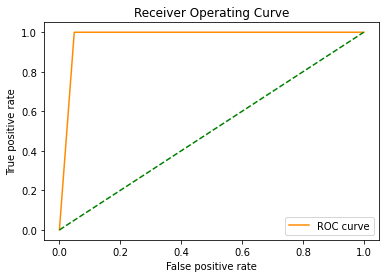

In [492]:
plt.plot(fpr,tpr,color='darkorange',label='ROC curve')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()

# saving the model

In [493]:
import pickle

In [494]:
pickle.dump(svc,open('glass_svc','wb'))